Modelių MSE vertinimas: [1.7911466732311133e+17, 3.716317442213614e+17, 2.0963438676382432e+17, 2.7346592073874166e+17]
Modelių R2 vertinimas: [0.5253263975223785, 0.015134933051716204, 0.44444577847516165, 0.27528518076213904]


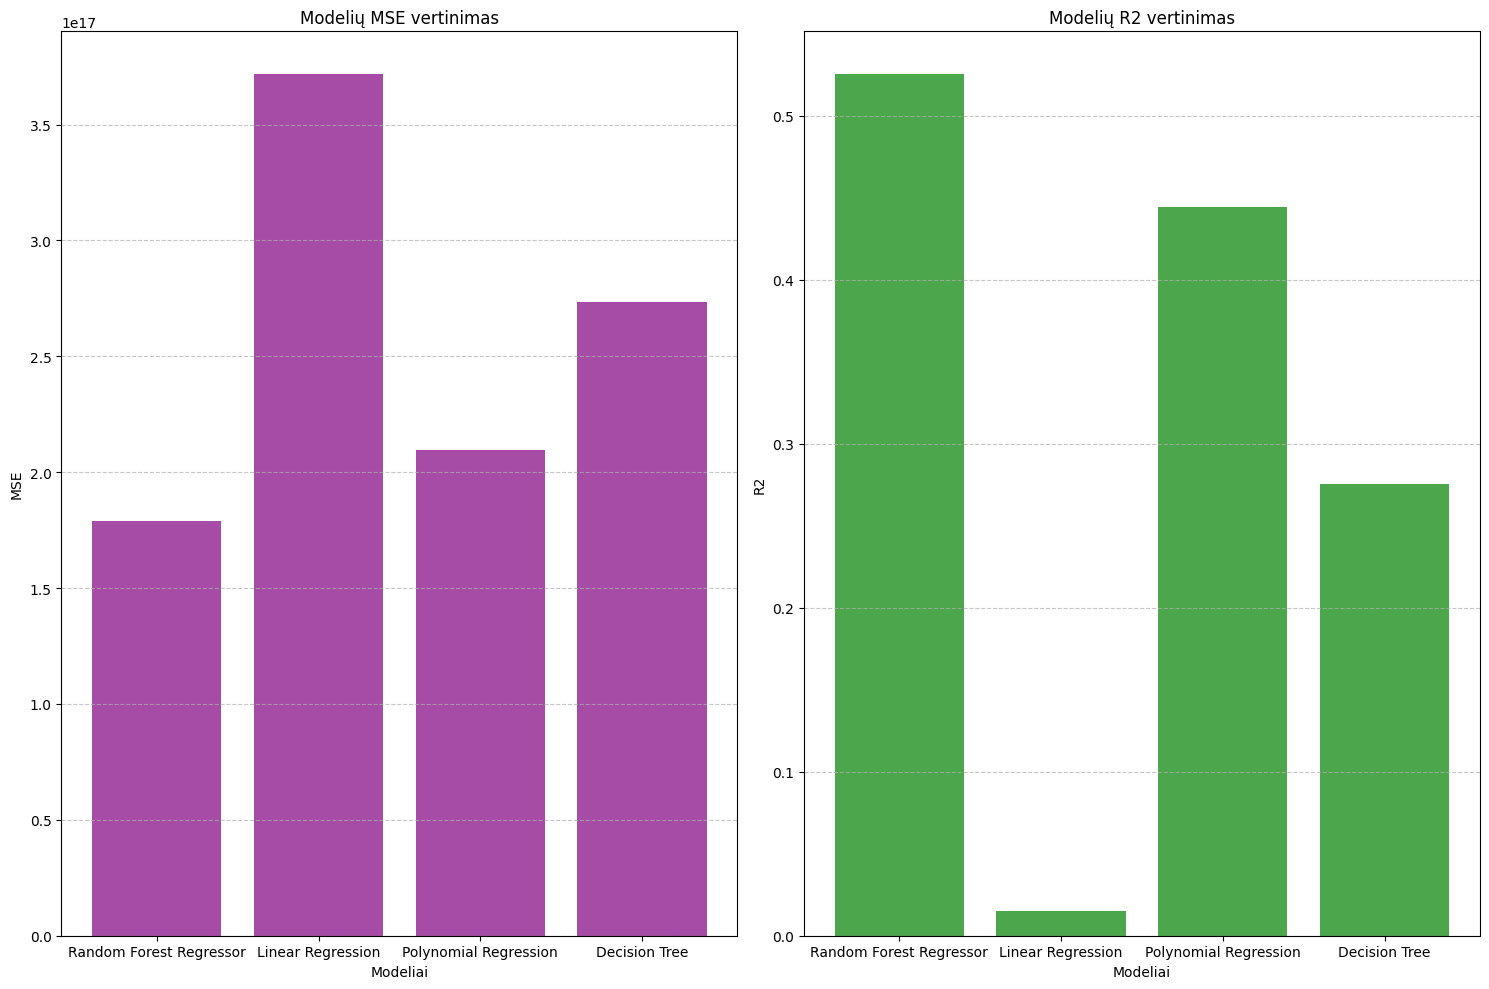

Random Forest Regressor R2: 0.5253263975223785
Linear Regression R2: 0.015134933051716204
Polynomial Regression R2: 0.44444577847516165
Decision Tree Regressor R2: 0.27528518076213904


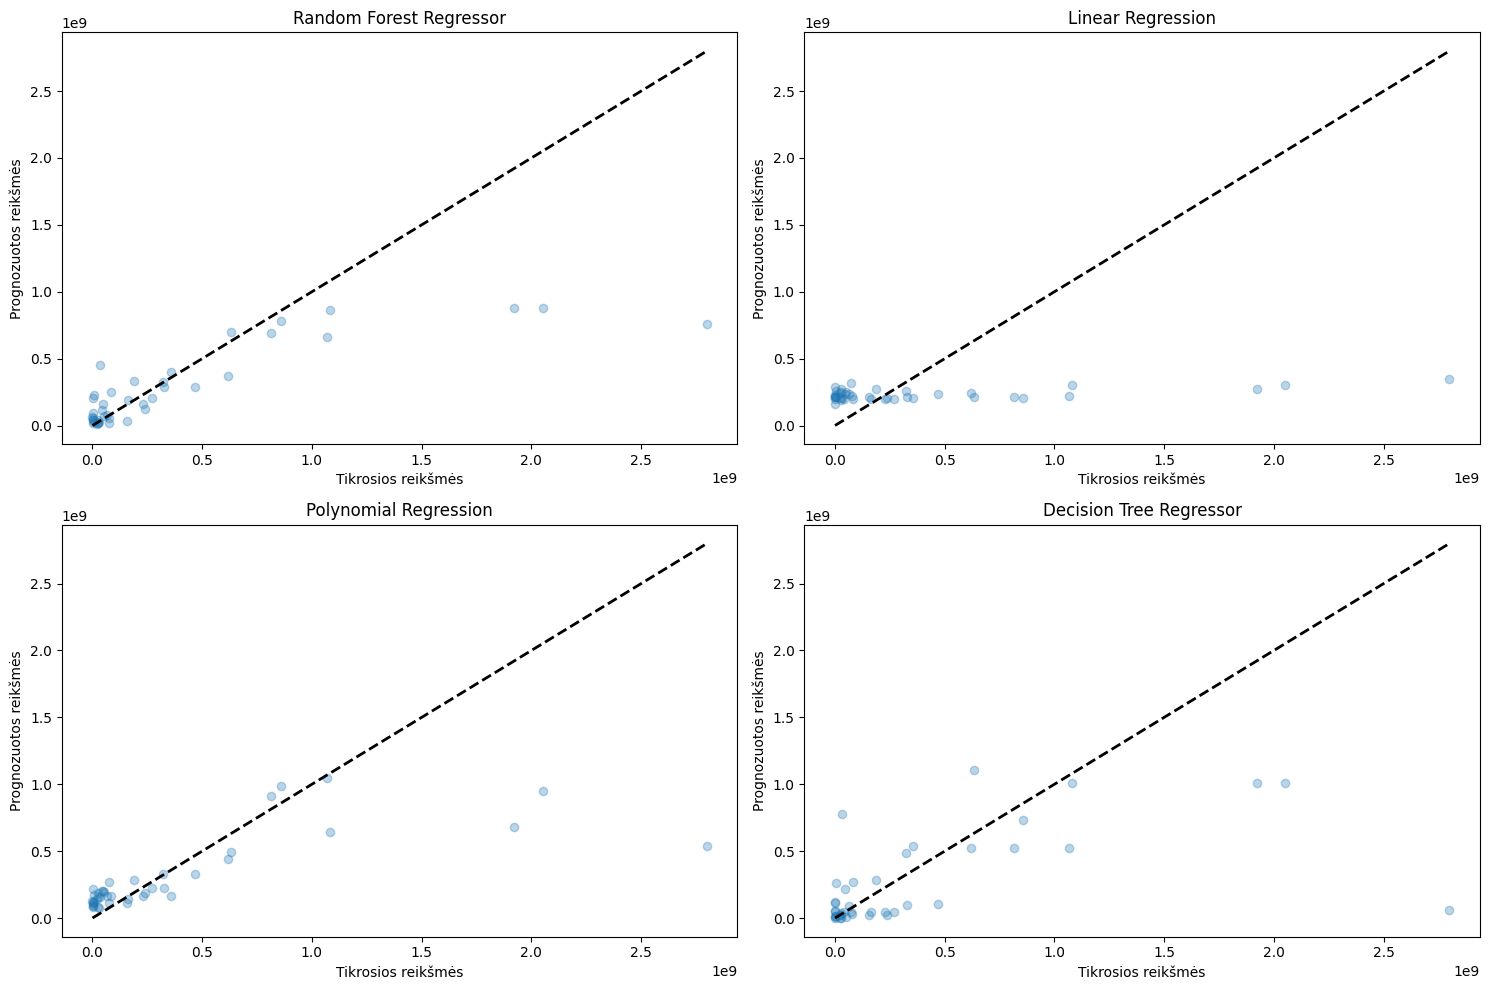

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv("IMDB_Top_250_movies_koreguoti_runtime_cleaned.csv")

X = df[['budget', 'runtime']]
y = df['box_office']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sukuriame modelius
# 1. Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# 2. Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# 3. Polynomial Regression
poly_features = PolynomialFeatures(degree=2)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
poly_predictions = poly_model.predict(X_poly_test)

# 4. Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Įvertiname modelius
models = ['Random Forest Regressor', 'Linear Regression', 'Polynomial Regression', 'Decision Tree']
predictions = [rf_predictions, lr_predictions, poly_predictions, dt_predictions]

mse_values = [mean_squared_error(y_test, pred) for pred in predictions]
r2_values = [r2_score(y_test, pred) for pred in predictions]

print("Modelių MSE vertinimas:", mse_values)
print("Modelių R2 vertinimas:", r2_values)


plt.figure(figsize=(15, 10))

# MSE diagrama
plt.subplot(1, 2, 1)
plt.bar(models, mse_values, color='purple', alpha=0.7)
plt.xlabel('Modeliai')
plt.ylabel('MSE')
plt.title('Modelių MSE vertinimas')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# R2 diagrama
plt.subplot(1, 2, 2)
plt.bar(models, r2_values, color='green', alpha=0.7)
plt.xlabel('Modeliai')
plt.ylabel('R2')
plt.title('Modelių R2 vertinimas')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Įvertiname modelių veikimą
print("Random Forest Regressor R2:", r2_score(y_test, rf_predictions))
print("Linear Regression R2:", r2_score(y_test, lr_predictions))
print("Polynomial Regression R2:", r2_score(y_test, poly_predictions))
print("Decision Tree Regressor R2:", r2_score(y_test, dt_predictions))

# Sklaidos diagramos
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.scatter(y_test, rf_predictions, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Random Forest Regressor')
plt.xlabel('Tikrosios reikšmės')
plt.ylabel('Prognozuotos reikšmės')

plt.subplot(2, 2, 2)
plt.scatter(y_test, lr_predictions, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Linear Regression')
plt.xlabel('Tikrosios reikšmės')
plt.ylabel('Prognozuotos reikšmės')

plt.subplot(2, 2, 3)
plt.scatter(y_test, poly_predictions, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Polynomial Regression')
plt.xlabel('Tikrosios reikšmės')
plt.ylabel('Prognozuotos reikšmės')

plt.subplot(2, 2, 4)
plt.scatter(y_test, dt_predictions, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Decision Tree Regressor')
plt.xlabel('Tikrosios reikšmės')
plt.ylabel('Prognozuotos reikšmės')

plt.tight_layout()
plt.show()


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv("IMDB_Top_250_movies_koreguoti_runtime_cleaned.csv")

df = df.dropna(subset=['budget', 'box_office'])

X = df[['budget', 'runtime']]
y = df['box_office']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Nustatome hiperparametrų erdvę
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_features': [1, 2], 
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Sukuriame RandomForestRegressor modelį
rf = RandomForestRegressor(random_state=42)

# Sukuriame GridSearchCV objektą
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Treniruojame GridSearchCV
grid_search.fit(X_train, y_train)

# Geriausi parametrai ir jų rezultatai
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Naudojame geriausius hiperparametrus modelio treniravimui
best_rf_model = grid_search.best_estimator_

# Prognozuojame su testiniu rinkiniu
rf_predictions = best_rf_model.predict(X_test)

# Įvertiname modelį
mse_rf = mean_squared_error(y_test, rf_predictions)
r2_rf = r2_score(y_test, rf_predictions)

print("Random Forest Regressor MSE:", mse_rf)
print("Random Forest Regressor R2:", r2_rf)

Best Parameters: {'max_depth': None, 'max_features': 1, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Best Score: -4.951017297647625e+16
Random Forest Regressor MSE: 2.319626135154754e+17
Random Forest Regressor R2: 0.3852735175568295


In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor(n_estimators=50, max_depth=None, max_features=1, min_samples_leaf=4, min_samples_split=10)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2.2798847700606086e+17


In [11]:
# issaugoti modeli joblib

from joblib import dump
dump(model, 'IMDB_model.sav')

['IMDB_model.sav']